# Data

From the Angoulême in 1764 project:
https://histecon.fas.harvard.edu/visualizing/angouleme/overview.html

In [1]:
df = read.csv("EDGESpublic6.11.20.csv")

## Step 1: Turn this into all unweighted, directed edges.

In [4]:
edgelist = rbind(data.frame(source=df[, 'Source'], target=df[, 'Target']),
                 data.frame(source=df[df[, 'Type'] == 'Undirected', 'Target'], target=df[df[, 'Type'] == 'Undirected', 'Source']))

1. Number of edges?

2. Number of nodes?

In [5]:
nodes = read.csv("NODESpublic6.11.20.csv")

## 1. Degree distribution

Make a variable `degrees` with the number of edges from each node.

In [106]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



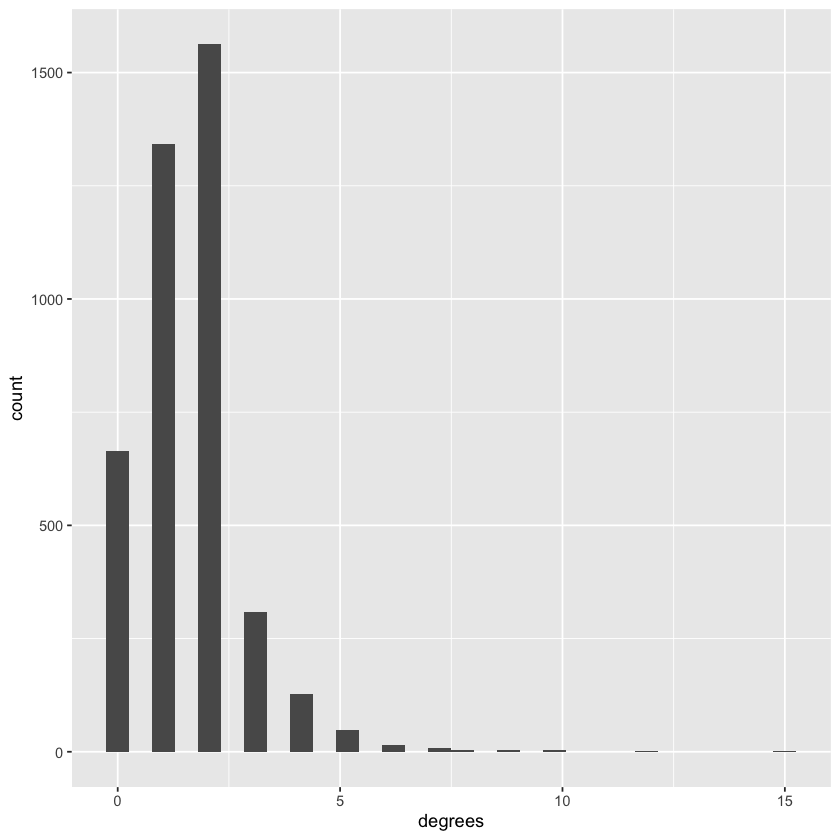

In [107]:
ggplot(data.frame(degrees), aes(degrees)) + geom_histogram()

In [108]:
max(degrees)

[1] 15

In [109]:
nodes[which.max(degrees),]

,ID,Label,I.O,Parish,Origin,Birth,Death,Occupation,Gender,Primary.for.1764,Event.Category
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3949,3476,"Coste, Jean (ii)",OUTER,St Yrieix,,,,,m,n,


In [112]:
df[df$Source == 3476,]

,Source,Target,Type,label,weight,sourcename,targetname,start.date,end.date,record,i.o
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5029,3476,3654,Directed,signatory (marriage),1,"Coste, Jean (ii)","Robert, Antoinette",,,m 117/22,
5191,3476,3825,Directed,witness (baptism),1,"Coste, Jean (ii)","Batut, Louis",12/21/1764,12/21/1764,b 117/25,
5192,3476,3830,Directed,witness (baptism),1,"Coste, Jean (ii)","Merginac, Jean",12/21/1764,12/21/1764,b 117/25,
5194,3476,3835,Directed,witness (burial),1,"Coste, Jean (ii)","Martaud, Francoise",12/23/1764,12/23/1764,d 117/26,
5263,3476,3470,Directed,witness (marriage),1,"Coste, Jean (ii)","Phelippeaux, Denis",2/14/1764,2/14/1764,m 117/18,
5264,3476,3473,Directed,witness (marriage),1,"Coste, Jean (ii)","Dulac, Marie",2/14/1764,2/14/1764,m 117/18,
5265,3476,3480,Directed,witness (marriage),1,"Coste, Jean (ii)","Dulac, Jean",2/14/1764,2/14/1764,m 117/19,
5266,3476,3481,Directed,witness (marriage),1,"Coste, Jean (ii)","Phelippeaux, Marie",2/14/1764,2/14/1764,m 117/19,
5267,3476,3482,Directed,witness (marriage),1,"Coste, Jean (ii)","Benetaud, Jacques",2/14/1764,2/14/1764,m 117/19,


## 2. Shortest paths

In [170]:
start = 2636
dists = rep(Inf, max(nodes$ID))
dists[start] = 0
queue = c(start)

In [171]:
# Iteration 1

In [186]:
node = queue[1]
queue = queue[-1]
mydist = dists[node]

In [189]:
which(edgelist$source == node)

[1]  561 1877 5330

In [176]:
ii = 1

In [178]:
dists[edgelist$target[ii]] 

[1] Inf

In [179]:
dists[edgelist$target[ii]] = mydist + 1

In [180]:
queue = c(queue, edgelist$target[ii])

In [181]:
ii = 1874

In [182]:
dists[edgelist$target[ii]] 

[1] Inf

In [183]:
dists[edgelist$target[ii]] = mydist + 1

In [184]:
queue = c(queue, edgelist$target[ii])

In [185]:
queue

[1] 2639 3371

In [190]:
# Iteration 2

In [196]:
node = queue[1]
queue = queue[-1]
mydist = dists[node]

In [197]:
for (ii in which(edgelist$source == node)) {
    if (dists[edgelist$target[ii]] > mydist + 1) {
        dists[edgelist$target[ii]] = mydist + 1
        queue = c(queue, edgelist$target[ii])
    }
}

In [198]:
queue

numeric(0)

In [201]:
dists

[1] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
  [19] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
  [37] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
  [55] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
  [73] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
  [91] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [109] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [127] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [145] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [163] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [181] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [199] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [217] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [235] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [253] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [271] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [289] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [307] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [325] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [343] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [361] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [379] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [397] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [415] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [433] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [451] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [469] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [487] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [505] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [523] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [541] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [559] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [577] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [595] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [613] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [631] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [649] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [667] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [685] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [703] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [721] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [739] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [757] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [775] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [793] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [811] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [829] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [847] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [865] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [883] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf
 [901] Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf Inf In

In [207]:
dists[dists != Inf]

[1] 0 1 2 1

In [203]:
mean(dists[dists != Inf])

[1] 1

In [204]:
all_shortest_paths <- function(start, iters=Inf) {
    dists = rep(Inf, max(nodes$ID))
    dists[start] = 0
    queue = c(start)
    
    while (length(queue) > 0 && iters > 0) {
        ## Dequeue first item
        node = queue[1]
        queue = queue[-1]
        mydist = dists[node]
        
        ## Consider each neighbor
        for (ii in which(edgelist$source == node)) {
            if (dists[edgelist$target[ii]] > mydist + 1) {
                dists[edgelist$target[ii]] = mydist + 1
                queue = c(queue, edgelist$target[ii])
            }
        }
        
        iters = iters - 1
    }
    
    dists
}

In [205]:
dists = all_shortest_paths(edgelist$source[1])

In [209]:
dists[dists != Inf]

[1] 0 1 2 1

In [228]:
meandists = c()
for (start in edgelist$source) {
    dists = all_shortest_paths(start)
    meandists = c(meandists, mean(dists[dists != 0 & dists != Inf]))
}

In [235]:
meandists

[1] 1.333333 1.500000 1.125000 1.200000 1.250000 1.666667 1.250000 1.750000
   [9] 2.166667 1.000000 1.000000 1.000000 1.166667 1.000000 1.000000 1.000000
  [17] 1.000000 1.000000 1.500000 1.500000 1.250000 1.333333 1.000000 1.333333
  [25] 1.000000 1.333333 1.000000 1.000000 1.000000 1.333333 1.333333 1.800000
  [33] 1.333333 1.800000 1.333333 1.000000 1.000000 1.000000 1.000000 1.600000
  [41] 2.111111 1.666667 1.333333 1.333333 1.200000 1.750000 1.600000 1.000000
  [49] 1.000000 1.200000 1.750000 1.000000 1.000000 1.000000 1.000000 1.333333
  [57] 1.500000 1.000000 2.600000 1.285714 2.111111 2.000000 1.428571 1.000000
  [65] 1.000000 1.125000 1.600000 1.600000 1.555556 1.000000 1.333333 1.833333
  [73] 1.833333 1.000000 1.000000 1.000000 1.000000 2.300000 1.250000 1.000000
  [81] 1.500000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000
  [89] 2.687500 1.500000 1.000000 1.000000 1.000000 1.750000 1.500000 1.875000
  [97] 2.750000 1.000000 1.000000 1.000000 1.000000 1.000000 1.166667 1.166667
 [105] 1.000000 1.000000 1.500000 1.500000 1.000000 1.000000 1.000000 1.000000
 [113] 1.000000 1.400000 1.400000 2.000000 1.400000 1.400000 1.400000 1.333333
 [121] 1.000000 1.000000 1.000000 1.000000 1.000000 1.250000 1.000000 1.200000
 [129] 1.000000 1.000000 1.000000 1.000000 1.333333 1.000000 2.300000 2.900000
 [137] 1.000000 1.500000 1.000000 1.333333 1.000000 1.500000 1.500000 1.000000
 [145] 1.000000 1.250000 1.833333 1.666667 1.000000 1.000000 1.166667 1.000000
 [153] 1.000000 1.400000 1.000000 1.600000 1.800000 1.222222 1.500000 1.000000
 [161] 1.400000 1.000000 1.750000 1.000000 1.000000 1.000000 1.000000 1.000000
 [169] 1.000000 1.000000 1.333333 1.000000 1.500000 1.000000 1.333333 1.000000
 [177] 1.000000 1.000000 1.000000 1.000000 2.650000 1.000000 1.200000 1.142857
 [185] 1.000000 1.000000 1.000000 1.333333 1.000000 1.000000 1.500000 1.000000
 [193] 1.666667 1.333333 2.166667 1.000000 1.571429 1.000000 1.000000 1.000000
 [201] 1.285714 1.000000 1.333333 1.666667 2.066667 1.764706 1.333333 1.000000
 [209] 1.000000 1.250000 1.000000 1.600000 1.000000 1.250000 1.000000 1.666667
 [217] 1.000000 1.000000 1.285714 1.200000 1.000000 1.000000 1.333333 1.750000
 [225] 1.000000 1.000000 1.200000 1.000000 1.000000 1.000000 1.000000 1.500000
 [233] 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.333333
 [241] 2.363636 2.555556 2.272727 1.000000 1.666667 1.000000 1.000000 1.000000
 [249] 1.000000 1.750000 1.000000 1.000000 1.000000 1.500000 1.500000 1.750000
 [257] 1.333333 1.000000 1.333333 1.333333 1.000000 1.000000 1.500000 1.500000
 [265] 1.000000 1.333333 1.000000 1.333333 1.000000 1.000000 1.000000 1.000000
 [273] 1.500000 1.000000 1.000000 1.500000 1.000000 1.333333 1.000000 1.000000
 [281] 1.000000 1.000000 1.000000 1.000000 1.000000 1.750000 1.250000 1.000000
 [289] 1.000000 1.000000 1.333333 1.333333 1.000000 1.000000 1.500000 1.500000
 [297] 1.000000 1.000000 2.666667 3.352941 1.000000 1.500000 1.500000 1.000000
 [305] 1.000000 1.333333 1.000000 1.000000 1.250000 1.750000 1.200000 1.850000
 [313] 1.000000 1.333333 1.333333 1.250000 1.000000 1.000000 1.333333 1.000000
 [321] 1.000000 1.909091 1.000000 1.500000 1.500000 2.200000 1.400000 1.000000
 [329] 1.750000 1.000000 1.000000 1.000000 1.333333 1.333333 1.000000 1.000000
 [337] 1.333333 2.000000 1.000000 1.666667 1.600000 1.000000 1.750000 2.166667
 [345] 1.500000 1.000000 1.333333 1.800000 1.333333 1.833333 1.000000 1.000000
 [353] 1.333333 1.333333 2.833333 2.333333 1.000000 1.333333 2.090909 2.363636
 [361] 1.000000 1.333333 1.200000 1.000000 1.000000 1.000000 1.500000 1.777778
 [369] 2.454545 3.090909 1.000000 1.000000 1.000000 1.500000 2.250000 2.000000
 [377] 1.250000 1.833333 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000
 [385] 1.875000 1.875000 1.000000 1.000000 1.000000 1.000000 1.250000 1.833333
 [393] 2.333333 2.200000 2.400000 1.000000 1.400000 2.000000 1.400000 1.500000
 [401] 1.500000 1.000000 1.000000 1.000000 1.000000 1

In [229]:
mean(meandists)

[1] 1.307744

3. Clustering coefficient

In [231]:
calc_clustering = function(node) {
    neighbors = edgelist$target[edgelist$source == node] # j in A_ij
    triangles = 0
    for (node2 in neighbors) {
        neighbors2 = edgelist$target[edgelist$source == node2] # k in A_jk
        for (node3 in neighbors2) {
            if (node %in% edgelist$target[edgelist$source == node3]) 
                triangles = triangles + 1
        }
    }
    triangles / (length(neighbors) * (length(neighbors) - 1))
}

In [232]:
calc_clustering(edgelist$source[1])

[1] 0

In [233]:
clustering = c()
for (node in edgelist$source) {
    cc = calc_clustering(node)
    clustering = c(clustering, cc)
}

In [234]:
clustering

[1] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
   [7] 0.00000000        NaN 0.00000000 0.00000000 0.00000000 0.00000000
  [13] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  [19] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  [25]        NaN 0.00000000        NaN 0.00000000 0.00000000 0.00000000
  [31] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  [37] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  [43] 0.00000000 0.00000000 0.08333333 0.00000000 0.16666667 0.00000000
  [49]        NaN 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  [55] 0.00000000 0.00000000        NaN 0.00000000 0.00000000 0.35000000
  [61] 0.00000000 0.00000000 0.16666667 0.00000000 0.00000000 0.00000000
  [67] 0.00000000 0.00000000 0.00000000        NaN 0.00000000 0.00000000
  [73] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  [79] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  [85] 0.00000000        NaN        NaN        NaN 0.00000000 0.50000000
  [91] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
  [97] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [103] 0.00000000 0.00000000        NaN 0.00000000        NaN        NaN
 [109] 0.00000000 0.00000000        NaN 0.00000000 0.00000000 0.00000000
 [115] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [121] 0.00000000 0.00000000 0.00000000        NaN 0.00000000 0.00000000
 [127] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000        NaN
 [133] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [139] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [145] 0.00000000 0.16666667 0.00000000 0.00000000 0.00000000 0.00000000
 [151] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [157] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [163] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [169] 0.00000000        NaN 0.00000000 0.00000000        NaN 0.00000000
 [175] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [181] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [187] 0.00000000 0.00000000 0.00000000 0.00000000        NaN        NaN
 [193] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [199] 0.00000000 0.00000000 0.00000000        NaN 0.00000000 0.00000000
 [205] 0.33333333 0.00000000 0.00000000        NaN 0.00000000 0.00000000
 [211] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000        NaN
 [217] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [223] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [229] 0.00000000 0.00000000 0.00000000        NaN 0.00000000 0.00000000
 [235] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [241] 0.00000000        Inf 0.00000000        NaN        NaN        NaN
 [247] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [253] 0.00000000 0.00000000        NaN 0.00000000 0.00000000        NaN
 [259] 0.00000000 0.00000000        NaN        NaN 0.00000000 0.00000000
 [265]        NaN 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [271] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000        NaN
 [277]        NaN 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [283] 0.00000000 0.00000000        NaN 0.00000000 0.00000000 0.00000000
 [289] 0.00000000        NaN 0.00000000 0.00000000 0.00000000        NaN
 [295] 0.00000000 0.00000000 0.00000000        NaN 0.16666667 0.00000000
 [301] 0.00000000 0.00000000 0.00000000        NaN        NaN 0.00000000
 [307]        NaN 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [313]        NaN 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
 [319] 0.00000000 0.00000000 0.00000000 0.04761905 0.00000000 0.00000000
 [325] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000

In [239]:
mean(clustering[is.finite(clustering)])

[1] 0.02727879

In [70]:
install.packages("igraph")

Installing package into ‘/Users/admin/Library/R/x86_64/4.1/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/rl/p7xkj5n56gb2hxfnwbc696x80000gn/T//RtmpYKdODm/downloaded_packages


In [71]:
library(igraph)


Attaching package: ‘igraph’


The following object is masked _by_ ‘.GlobalEnv’:

    all_shortest_paths


The following objects are masked from ‘package:network’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [269]:
net = graph_from_edgelist(as.matrix(edgelist), directed=T)

In [270]:
net

IGRAPH fa30bf4 D--- 4423 6414 -- 
+ edges from fa30bf4:
 [1] 2636->2639 3871-> 852  227->1336    2->   3    6->   7   11->  12
 [7]   13->  10   14->  10   25->  26   29->  28   31-> 111   33->  34
[13]   36-> 153   38->  39   48->  49   53->  54   56-> 809   57->  60
[19]   58->  59   61->  62   68->  69   73->  74   80->  81   86->  87
[25]   88->  85   89->  90   93->  94   96->  97  103-> 104  113-> 116
[31]  113-> 117  114-> 115  116-> 120  118-> 119  124->1426  126-> 127
[37]  131-> 132  139-> 140  143-> 146  144-> 145  147-> 148  148->1242
[43]  152->  44  157-> 158  162-> 163  164-> 309  166-> 298  168-> 169
[49]  172-> 173  175-> 176  180-> 181  185-> 186  189-> 190  192-> 193
+ ... omitted several edges

In [271]:
distances(net, mode="out")

0,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,⋯,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
1,0,1,Inf,Inf,Inf,Inf,Inf,Inf,Inf,⋯,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
1,1,0,Inf,Inf,Inf,Inf,Inf,Inf,Inf,⋯,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
1,Inf,Inf,0,Inf,Inf,Inf,Inf,Inf,Inf,⋯,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
Inf,Inf,Inf,Inf,0,Inf,Inf,Inf,Inf,Inf,⋯,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
Inf,Inf,Inf,Inf,1,0,1,Inf,Inf,Inf,⋯,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
Inf,Inf,Inf,Inf,1,1,0,Inf,Inf,Inf,⋯,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
Inf,Inf,Inf,Inf,1,Inf,Inf,0,Inf,Inf,⋯,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
Inf,Inf,Inf,Inf,1,Inf,Inf,Inf,0,Inf,⋯,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,0,⋯,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,1,⋯,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf


In [272]:
alldists = distances(net, mode="out")

In [280]:
dists = alldists[edgelist$source[1],]

In [283]:
dists[dists != Inf]

[1] 0 1 2 1

In [284]:
mean(dists[dists != 0 & dists != Inf])

[1] 1.333333

In [289]:
meandists = apply(alldists, 1, function(dists) mean(dists[dists != 0 & dists != Inf]))

In [290]:
meandists[edgelist$source[1]]

[1] 1.333333

In [291]:
mean(meandists, na.rm=T)

[1] 1.260741

In [292]:
transitivity(net)

[1] 0.2784316

In [293]:
eigen_centrality(net)

$vector
   [1] 2.486664e-16 0.000000e+00 3.196191e-16 2.727140e-16 1.274503e-16
   [6] 0.000000e+00 0.000000e+00 2.844719e-16 1.097087e-16 0.000000e+00
  [11] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [16] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [21] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [26] 0.000000e+00 1.244370e-16 1.626058e-16 1.695634e-16 0.000000e+00
  [31] 4.432624e-17 8.912262e-17 4.769092e-17 5.925825e-17 1.102533e-16
  [36] 0.000000e+00 1.123473e-16 1.664184e-16 1.712819e-16 0.000000e+00
  [41] 1.117862e-16 0.000000e+00 2.854202e-16 0.000000e+00 0.000000e+00
  [46] 7.035212e-17 2.664255e-16 2.233745e-16 2.020233e-16 3.008258e-16
  [51] 2.910333e-16 7.683551e-17 2.220738e-16 2.106838e-16 2.188934e-16
  [56] 0.000000e+00 0.000000e+00 1.589510e-16 1.567109e-16 0.000000e+00
  [61] 6.138739e-17 7.522662e-17 0.000000e+00 0.000000e+00 0.000000e+00
  [66] 2.854202e-16 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [71] 0.000000e+00 6.538810e-16 0.000000e+00 1.155608e-16 1.487242e-16
  [76] 1.481835e-16 1.435858e-16 1.494198e-16 2.777227e-16 2.027070e-16
  [81] 2.141397e-16 2.934854e-16 2.962963e-16 2.854202e-16 0.000000e+00
  [86] 2.082441e-17 8.709973e-18 0.000000e+00 1.667606e-17 1.449364e-17
  [91] 0.000000e+00 0.000000e+00 3.902591e-16 3.860353e-16 3.995977e-16
  [96] 1.177041e-16 1.175042e-16 2.250307e-16 2.264534e-16 2.854202e-16
 [101] 2.264210e-16 5.823689e-16 6.635189e-17 6.138858e-17 6.312093e-17
 [106] 6.731120e-17 6.365401e-17 3.890291e-17 1.757085e-16 2.110771e-16
 [111] 1.023136e-16 1.773077e-16 1.764295e-17 2.200928e-16 2.215132e-16
 [116] 1.478914e-17 7.456420e-18 2.136364e-16 2.166165e-16 0.000000e+00
 [121] 5.421518e-18 2.854202e-16 0.000000e+00 0.000000e+00 5.742827e-16
 [126] 2.717863e-17 3.127951e-17 1.223840e-16 1.199712e-16 2.261361e-16
 [131] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.935169e-16
 [136] 0.000000e+00 0.000000e+00 2.768390e-16 7.124379e-17 2.637694e-16
 [141] 0.000000e+00 0.000000e+00 0.000000e+00 6.196768e-19 0.000000e+00
 [146] 0.000000e+00 7.770498e-18 1.258843e-16 5.002572e-16 2.271650e-17
 [151] 2.854202e-16 1.866551e-16 0.000000e+00 8.471023e-17 4.804316e-16
 [156] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [161] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [166] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [171] 0.000000e+00 1.597474e-16 2.168594e-16 7.238038e-17 0.000000e+00
 [176] 0.000000e+00 4.134707e-17 0.000000e+00 0.000000e+00 0.000000e+00
 [181] 0.000000e+00 8.705017e-17 0.000000e+00 3.269809e-16 1.653458e-16
 [186] 1.639266e-16 1.004294e-16 0.000000e+00 0.000000e+00 0.000000e+00
 [191] 2.188976e-15 4.236597e-16 4.352802e-16 1.808730e-14 2.810136e-16
 [196] 0.000000e+00 3.986258e-17 3.873943e-17 1.975154e-16 1.223998e-16
 [201] 4.511967e-16 0.000000e+00 1.588965e-13 2.280873e-14 2.281465e-14
 [206] 2.854202e-16 1.769176e-14 2.854202e-16 1.193264e-11 1.963391e-11
 [211] 8.240237e-11 1.325552e-12 1.343080e-12 0.000000e+00 0.000000e+00
 [216] 1.039223e-16 1.098848e-16 1.221140e-16 1.255120e-16 2.929384e-17
 [221] 2.544714e-17 0.000000e+00 0.000000e+00 2.083153e-16 5.258716e-15
 [226] 5.260149e-15 2.857126e-13 0.000000e+00 0.000000e+00 0.000000e+00
 [231] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [236] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 9.105396e-17
 [241] 1.879674e-16 1.872552e-16 0.000000e+00 3.320046e-17 0.000000e+00
 [246] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.814757e-17
 [251] 2.427343e-16 3.011212e-16 4.276631e-16 8.209849e-17 9.184474e-17
 [256] 6.720814e-17 4.070292e-16 1.253978e-16 1.227355e-16 2.247186e-16
 [261] 2.218602e-16 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [266] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [271] 2.854202e-16 0.000000e+00 0.000000e+00 0.000000e+00 2.054078e-16
 [276] 2.854202e-16 0.000000e+00

In [295]:
length(eigen_centrality(net)$vector)

[1] 4423

In [294]:
which.max(eigen_centrality(net)$vector)

[1] 3476

In [299]:
nodes[nodes$ID == 3476,]

,ID,Label,I.O,Parish,Origin,Birth,Death,Occupation,Gender,Primary.for.1764,Event.Category
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3949,3476,"Coste, Jean (ii)",OUTER,St Yrieix,,,,,m,n,


In [300]:
betweenness(net)

[1]   0.0000000   3.0000000   0.0000000   0.0000000   0.0000000   0.0000000
   [7]   0.0000000   0.0000000   0.0000000  42.0000000   0.0000000   0.0000000
  [13]   0.0000000   8.0000000   0.0000000   0.0000000   0.0000000   0.0000000
  [19]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
  [25]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
  [31]   1.0000000   0.0000000   0.0000000   0.0000000   0.0000000   3.0000000
  [37]   0.0000000   0.0000000   0.0000000   2.0000000   0.0000000   0.0000000
  [43]   0.0000000   1.0000000   0.0000000   0.0000000   0.0000000   0.0000000
  [49]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
  [55]   0.0000000   1.0000000   6.5000000   0.0000000   0.0000000   5.0000000
  [61]   0.0000000   0.5000000   0.0000000   0.0000000   0.0000000   0.0000000
  [67]   0.0000000   4.0000000   4.0000000   0.0000000   0.0000000   0.0000000
  [73]   4.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
  [79]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
  [85]   2.0000000   0.0000000   0.0000000   2.0000000   0.0000000   0.0000000
  [91]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
  [97]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [103]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [109]   0.0000000   0.0000000   0.0000000   0.0000000  18.0000000   0.0000000
 [115]   0.0000000  18.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [121]   0.0000000   0.0000000   0.0000000   4.0000000   0.0000000   0.0000000
 [127]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [133]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [139]   0.0000000   4.0000000   0.0000000   0.0000000  22.0000000   0.0000000
 [145]   0.0000000   9.0000000   0.0000000   9.0000000   0.0000000   0.0000000
 [151]   0.0000000   0.0000000   1.0000000   0.0000000   0.0000000   0.0000000
 [157]   0.0000000   2.0000000   0.0000000   0.0000000   0.0000000   4.0000000
 [163]  24.0000000   0.5000000   0.0000000  27.0000000   2.0000000   0.0000000
 [169]   0.0000000   0.0000000   0.0000000   3.0000000   0.0000000   0.0000000
 [175]   6.0000000   0.0000000   0.0000000   0.0000000   0.0000000   3.0000000
 [181]   5.0000000   0.0000000   3.0000000   0.0000000   0.0000000   0.0000000
 [187]   0.0000000   0.0000000   2.0000000   2.0000000   0.0000000   0.0000000
 [193]   0.0000000   0.0000000   1.0000000   5.0000000   0.0000000   0.0000000
 [199]   0.0000000   0.0000000   0.0000000   1.0000000   0.0000000   0.0000000
 [205]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [211]  14.0000000   0.0000000   0.0000000  30.5000000  42.5000000   0.0000000
 [217]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [223]  48.0000000   0.0000000   0.0000000   0.0000000   5.0000000   0.0000000
 [229]   6.0000000   8.0000000   0.0000000   7.0000000   0.0000000   3.0000000
 [235]   6.0000000   0.0000000   0.0000000   0.0000000   0.0000000   2.0000000
 [241]   0.0000000   0.0000000   3.0000000  12.0000000   4.0000000   0.0000000
 [247]   0.0000000   0.0000000   0.0000000   0.0000000   1.0000000   0.0000000
 [253]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [259]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   8.0000000
 [265]   1.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [271]   0.0000000   0.0000000   0.0000000   2.0000000   0.0000000   0.0000000
 [277]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [283]   0.0000000   1.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [289]   0.0000000   0.0000000   0.0000000  18.0000000   0.0000000   0.0000000
 [295]   0.0000000   0.0000000   0.0000000  35.0000000   0.0000000   0.0000000
 [301]   0.0000000   0.0000000   0.0000000   1.000000

In [301]:
which.max(betweenness(net))

[1] 941

In [302]:
nodes[nodes$ID == 941,]

,ID,Label,I.O,Parish,Origin,Birth,Death,Occupation,Gender,Primary.for.1764,Event.Category
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
998,941,"Vigneaud, Michel",INNER,St Martin,St Andre,#REF!,,tisserand,m,y,m


In [303]:
df[df$Source == 941 | df$Target == 941,]

,Source,Target,Type,label,weight,sourcename,targetname,start.date,end.date,record,i.o
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
205,942,941,Undirected,marriage,3,"Sardin, Jeanne","Vigneaud, Michel",2/28/1764,,m 83/55,OUTER
1232,941,940,Directed,parent,3,"Vigneaud, Michel","Vigneaud, Genevieve",11/23/1764,,b 42/233,INNER
1237,944,941,Directed,parent,3,"Boilevin, Genevieve","Vigneaud, Michel",1738,,m 83/55,
1240,945,941,Directed,parent,3,"Vigneaud, Jean","Vigneaud, Michel",1738,,m 83/55,
2537,941,1359,Undirected,sibling,3,"Vigneaud, Michel","Vigneaud, Marie",,,m 42/221,
2598,2573,941,Undirected,sibling,3,"Vigneaud, Francoise","Vigneaud, Michel",,,b 130/4,INNER
3841,941,3151,Directed,signatory (baptism),1,"Vigneaud, Michel","Hay, Magdelaine",9/21/1764,9/21/1764,b 130/22,
4548,941,1360,Directed,signatory (marriage),1,"Vigneaud, Michel","Thirion, Francois",2/14/1764,,m 42/221,INNER
4549,941,4136,Directed,signatory (marriage),1,"Vigneaud, Michel","Balluet, Andre",5/22/1764,5/22/1764,m 83/57,


## 4. Infect someone

In [313]:
infected = rep(F, max(nodes$ID))

In [314]:
infected[941] = T

In [315]:
epidemic = data.frame(time=0:1, infections=0:1)
while (epidemic$infections[nrow(epidemic)] != epidemic$infections[nrow(epidemic)-1]) {
    infected[edgelist$target[edgelist$source %in% which(infected)]] = T
    epidemic = rbind(epidemic, data.frame(time=epidemic$time[nrow(epidemic)]+1, infections=sum(infected)))
}

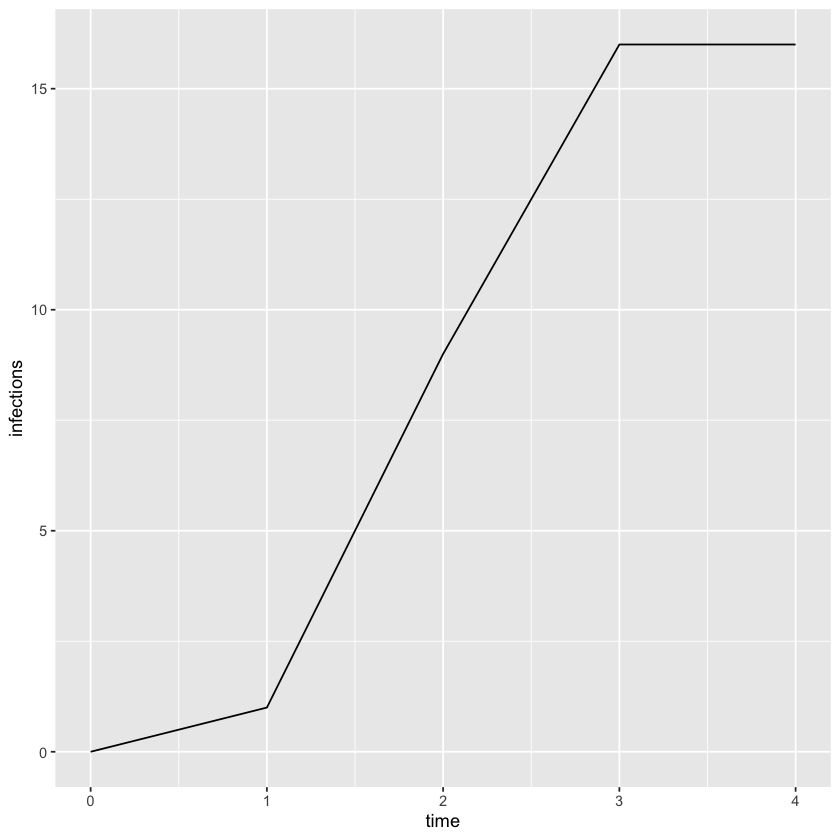

In [316]:
ggplot(epidemic, aes(time, infections)) + geom_line()

In [330]:
results = data.frame()
for (start in 1:max(nodes$ID)) {
    infected = rep(F, max(nodes$ID))
    infected[start] = T
    infections = 0
    while (sum(infected) > infections) {
        infections = sum(infected)
        infected[edgelist$target[edgelist$source %in% which(infected)]] = T
    }
    results = rbind(results, data.frame(start, infections))
}

In [331]:
head(results)

,start,infections
,<int>,<int>
1,1,1
2,2,6
3,3,6
4,4,2
5,5,1
6,6,5


In [332]:
max(results$infections)

[1] 28

In [333]:
which.max(results$infections)

[1] 3476